_Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2015 A. Srivastava_

# Telegrapher's Equations

The telegrapher's Equations are used to describe the votlage and/or current on the electrical transmission line as a function of distance and time. They were formulated when Oliver Heaviside developed the transmission line model in the 1880's. ([Source][wiki]) We will be using these equations to numerically model a second-order in space and second order in time problem.

## Derivation
When creating a transmission line model in electrical engineering, it is helpful to assume that that the cable is inmperfectly insulated, as no two conductors can be perfectly insulated due to the current flow between them. That leads to two assumptions:
* Capacitance (C) is relevant
* Current Leakage (Conductance, G) is relevant

The wire itself will also imply some: 
* Resistance (R) in the wire
* Inductance (L) in the wire
    
From these assertions, the wire can be modeled as follows ([Source][wiki]):

![Model From Wikipedia [wiki]](Transmission_line_element_svg.png)

From the image above, the following model arises:
$$\frac{\partial^{2}\gamma}{\partial x^{2}} = LC\frac{\partial^{2}\gamma}{\partial t^{2}} + (RC+GL)\frac{\partial\gamma}{\partial t} + RG\gamma \tag{1}$$ 

where $\gamma \implies i(x,t), v(x,t)$ with $i(x,t)$ and $v(x,t)$ being the functions or the current and voltage, respectively. Another way to derive the equations is to ignore the Resistance and Conductance from the begining of the model. which will lead you to the following equations: 

$$\begin{gather}
\frac{\partial}{\partial x}\left[v(x,t)\right]=-L\frac{\partial}{\partial t}\left[i(x,t)\right]\tag{2}\\
\frac{\partial}{\partial x}\left[i(x,t)\right]=-C\frac{\partial}{\partial t}\left[v(x,t)\right]\tag{3}
\end{gather}$$

A more in-depth derivation can be found [here][deriv] and [here][deriv2].

For lossless transmission, we can say that the losses due to an current leakage and internal resistance go to zero. That is: 
* $ R \rightarrow 0$
* $ G \rightarrow 0$

This simplifies Equation 1 to: $$\frac{\partial^{2}\gamma}{\partial x^{2}} = LC\frac{\partial^{2}\gamma}{\partial t^{2}}\tag{4}$$

which then breaks down into either of the following two equations for voltage and current, respectively:
$$\begin{gather}
\frac{\partial^{2}}{\partial x^{2}}\left[v(x,t)\right] = LC\frac{\partial^{2}}{\partial t^{2}}\left[v(x,t)\right]\tag{5}\\
\frac{\partial^{2}}{\partial x^{2}}\left[i(x,t)\right] = LC\frac{\partial^{2}}{\partial t^{2}}\left[i(x,t)\right]\tag{6}
\end{gather}$$

Equations 2 and 3 can also become Equation 5 or 6 by using mixed partials, as shown [here][deriv2].

## Boundary Conditions
When inspecting Equations 5 or 6, the question arises: why should we expect different results for the the current and voltage? The answer lies in the boundary conditions (and only defining the boundary condition for one of the equations)!

### Voltage - $v(x,t)$
Voltage boundary conditions will be Dirichlet conditions, in that both ends of our wire segment will have a fixed voltage potential. It will be this potential that drives the current in a single direction (though the current will be of opposite sign to the voltage function). For our purposes, we will say that our wire segment is grounded at both ends. That is: 

$$
v(0,t) = v(l,t) = 0
$$ 


over domain/wire-segment-length $l$.

We will also need two intial conditions, one of which will be Dirichlet and the other will be Neumann. For our cases, since the voltage is fixed, it won't change in time, so the Neumann initial condition implies: $$\frac{\partial}{\partial t}[v(x,0)] = 0$$

The Dirichlet condition is some arbitrary value that would be determined by the system upstream (such as a battery or a transformer). Allow $v(x,0)\equiv\alpha$.

Discussion based upon [this source][vol-bc].

### Current - $i(x,t)$
Instead of trying to define boundary conditions and solving Equation 6, we can use either Equation 2 or 3 to find the current. This is because the same boundary conditions apply to the system. This, however, is outside the scope of this document, and is left as a "Dig Deeper" assignment for the reader.

## Discretization
From our discussion of Boundary Conditions above, we know that the only equation we have to numerically solve is Equation 5. So let's inspect it for clues on the discretization scheme. Here's Equation 5 again: 

$$\frac{\partial^{2}}{\partial x^{2}}\left[v(x,t)\right] = LC\frac{\partial^{2}}{\partial t^{2}}\left[v(x,t)\right]\tag{5}$$

* Second order in space, so we can use a central difference scheme
* Second order in time, so we can use a central difference shcheme here as well
* Since everything is second order, we will have to use the second order Neumann Approximation (Dirichlet conditions are order-independant).

For $\frac{\partial^{2}}{\partial x^{2}}\left[v(x,t)\right]$, we start with two taylor expansions:

$$\begin{gather}
v^{n}_{i+1} = v^{n}_{i} + \left.\Delta x \frac{\partial v^{n}}{\partial x}\right|_{i} + \left.\frac{\Delta x^{2}}{2} \frac{\partial^{2} v^{n}}{\partial x^{2}}\right|_{i} + \left.\frac{\Delta x^{3}}{6} \frac{\partial^{3} v^{n}}{\partial x^{3}}\right|_{i} + \left.\frac{\Delta x^{4}}{24} \frac{\partial^{4} v^{n}}{\partial x^{4}}\right|_{i}+...\tag{7}\\
v^{n}_{i-1} = v^{n}_{i} - \left.\Delta x \frac{\partial v^{n}}{\partial x}\right|_{i} + \left.\frac{\Delta x^{2}}{2} \frac{\partial^{2} v^{n}}{\partial x^{2}}\right|_{i} - \left.\frac{\Delta x^{3}}{6} \frac{\partial^{3} v^{n}}{\partial x^{3}}\right|_{i} + \left.\frac{\Delta x^{4}}{24} \frac{\partial^{4} v^{n}}{\partial x^{4}}\right|_{i}+...\tag{8}
\end{gather}$$ 

Summing Equations 7 and 8, we get: 

$$\begin{gather}
v^{n}_{i+1} + v^{n}_{i-1} = 2v^{n}_{i} + \left.\Delta x^{2}\frac{\partial^{2} v^{n}}{\partial x^{2}}\right|_{i} + \left.\frac{\Delta x^{4}}{12} \frac{\partial^{4} v^{n}}{\partial x^{4}}\right|_{i}\tag{9}+...\\
\frac{v^{n}_{i+1} + v^{n}_{i-1} - 2v^{n}_{i}}{\Delta x^{2}} = \left.\frac{\partial^{2} v^{n}}{\partial x^{2}}\right|_{i} + \left.\frac{\Delta x^{2}}{12} \frac{\partial^{4} v^{n}}{\partial x^{4}}\right|_{i}+...\tag{10}
\end{gather}$$

Allowing $\left.\frac{\Delta x^{2}}{12} \frac{\partial^{4} v^{n}}{\partial x^{4}}\right|_{i}+... \equiv O(\Delta x^{2})$, Equation 10 then becomes:

$$\begin{gather}
\frac{v^{n}_{i+1} + v^{n}_{i-1} - 2v^{n}_{i}}{\Delta x^{2}} = \left.\frac{\partial^{2} v^{n}}{\partial x^{2}}\right|_{i} + O(\Delta x^{2})\tag{11}\\
\frac{v^{n}_{i+1} + v^{n}_{i-1} - 2v^{n}_{i}}{\Delta x^{2}} - O(\Delta x^{2}) = \left.\frac{\partial^{2} v^{n}}{\partial x^{2}}\right|_{i} \tag{12}
\end{gather}$$

Similarly, for $\frac{\partial^{2}}{\partial t^{2}}\left[v(x,t)\right]$, we start with two taylor expansions:

$$\begin{gather}
v^{n+1}_{i} = v^{n}_{i} + \left.\Delta t \frac{\partial v^{n}}{\partial t}\right|_{i} + \left.\frac{\Delta t^{2}}{2} \frac{\partial^{2} v^{n}}{\partial t^{2}}\right|_{i} + \left.\frac{\Delta t^{3}}{6} \frac{\partial^{3} v^{n}}{\partial t^{3}}\right|_{i} + \left.\frac{\Delta t^{4}}{24} \frac{\partial^{4} v^{n}}{\partial t^{4}}\right|_{i}+...\tag{13}\\
v^{n-1}_{i} = v^{n}_{i} - \left.\Delta t \frac{\partial v^{n}}{\partial t}\right|_{i} + \left.\frac{\Delta t^{2}}{2} \frac{\partial^{2} v^{n}}{\partial t^{2}}\right|_{i} - \left.\frac{\Delta t^{3}}{6} \frac{\partial^{3} v^{n}}{\partial t^{3}}\right|_{i} + \left.\frac{\Delta t^{4}}{24} \frac{\partial^{4} v^{n}}{\partial t^{4}}\right|_{i}+...\tag{14}
\end{gather}$$ 

Summing Equations 13 and 14, we get:

$$\begin{gather}
v^{n+1}_{i} + v^{n-1}_{i} = 2v^{n}_{i} + \left.\Delta t^{2}\frac{\partial^{2} v^{n}}{\partial t^{2}}\right|_{i} + \left.\frac{\Delta t^{4}}{12} \frac{\partial^{4} v^{n}}{\partial t^{4}}\right|_{i}+...\tag{15}\\
\frac{v^{n+1}_{i} + v^{n-1}_{i} - 2v^{n}_{i}}{\Delta t^{2}} = \left.\frac{\partial^{2} v^{n}}{\partial t^{2}}\right|_{i} + \left.\frac{\Delta t^{2}}{12} \frac{\partial^{4} v^{n}}{\partial t^{4}}\right|_{i}+...\tag{16}
\end{gather}$$

Allowing $\left.\frac{\Delta t^{2}}{12} \frac{\partial^{4} v^{n}}{\partial t^{4}}\right|_{i}+... \equiv O(\Delta t^{2})$, Equation 16 then becomes:

$$\begin{gather}
\frac{v^{n+1}_{i} + v^{n-1}_{i} - 2v^{n}_{i}}{\Delta t^{2}} = \left.\frac{\partial^{2} v^{n}}{\partial t^{2}}\right|_{i} + O(\Delta t^{2})\tag{17}\\
\frac{v^{n+1}_{i} + v^{n-1}_{i} - 2v^{n}_{i}}{\Delta t^{2}} - O(\Delta t^{2}) = \left.\frac{\partial^{2} v^{n}}{\partial t^{2}}\right|_{i} \tag{18}
\end{gather}$$

Plugging in Equation 12 and Equation 18 into Equation 5, we get:

$$\begin{gather}
\frac{v^{n}_{i+1} + v^{n}_{i-1} - 2v^{n}_{i}}{\Delta x^{2}} - O(\Delta x^{2}) = LC\frac{v^{n+1}_{i} + v^{n-1}_{i} - 2v^{n}_{i}}{\Delta t^{2}} - (LC)O(\Delta t^{2})\tag{20}\\
v^{n+1}_{i} + v^{n-1}_{i} - 2v^{n}_{i}=\left[\frac{1}{LC}\left(\frac{v^{n}_{i+1} + v^{n}_{i-1} - 2v^{n}_{i}}{\Delta x^{2}} - O(\Delta x^{2})\right) + O(\Delta t^{2})\right]\Delta t^{2}\tag{21}\\
v^{n+1}_{i}= - v^{n-1}_{i} + 2v^{n}_{i} + \left[\frac{1}{LC}\left(\frac{v^{n}_{i+1} + v^{n}_{i-1} - 2v^{n}_{i}}{\Delta x^{2}} - O(\Delta x^{2})\right) + O(\Delta t^{2})\right]\Delta t^{2}\tag{22}
\end{gather}$$

Equation 22 allows us to march forward in time for each point based on information gleaned from the two immediate neighbors in space, and previous 2 iterations of the problems. These are to be handled by our boundary and initial conditions, respectively. Simplifying it some more, and noticing that $[O(\Delta t^{2})]\Delta t^{2}\equiv O(\Delta t^{4})$, we get:

$$
v^{n+1}_{i}= O(\Delta t^{4}) + \left(\frac{\Delta t^{2}}{LC}\right)O(\Delta x^{2}) +\frac{\Delta t^{2}}{LC\Delta x^{2}}\left[v^{n}_{i+1} + v^{n}_{i-1}\right]- v^{n-1}_{i} + 2v^{n}_{i}\left[1-\frac{\Delta t^{2}}{LC\Delta x^{2}}\right]\tag{23}
$$

Equation 23 is our final equation, without any loss of generality and including higher order terms to account for the error. Now we can say that $O(\Delta t^{4})\ll 1$ and $(\frac{\Delta t^{2}}{LC})O(\Delta x^{2}) \ll 1$ for sufficiently small $\Delta t$ and $\Delta x$, and for the sake of coding the problem, let's allow $LC\equiv 1$. With these assumptions, our discretization reaches it's final form:

$$
v^{n+1}_{i}= \frac{\Delta t^{2}}{\Delta x^{2}}\left[v^{n}_{i+1} + v^{n}_{i-1}\right]- v^{n-1}_{i} + 2v^{n}_{i}\left[1-\frac{\Delta t^{2}}{\Delta x^{2}}\right]\tag{24}
$$

Equation 24 will be the final descritization that we will need to code for the numerical solution. The only other thing to consider is a second order Neumann initial condition.

### Second order Neumann Initial Condition

Recall Equations 13 and 14, our Taylor expansions in the Time Domain:

$$\begin{gather}
v^{n+1}_{i} = v^{n}_{i} + \left.\Delta t \frac{\partial v^{n}}{\partial t}\right|_{i} + \left.\frac{\Delta t^{2}}{2} \frac{\partial^{2} v^{n}}{\partial t^{2}}\right|_{i} + \left.\frac{\Delta t^{3}}{6} \frac{\partial^{3} v^{n}}{\partial t^{3}}\right|_{i} + \left.\frac{\Delta t^{4}}{24} \frac{\partial^{4} v^{n}}{\partial t^{4}}\right|_{i}+...\tag{13}\\
v^{n-1}_{i} = v^{n}_{i} - \left.\Delta t \frac{\partial v^{n}}{\partial t}\right|_{i} + \left.\frac{\Delta t^{2}}{2} \frac{\partial^{2} v^{n}}{\partial t^{2}}\right|_{i} - \left.\frac{\Delta t^{3}}{6} \frac{\partial^{3} v^{n}}{\partial t^{3}}\right|_{i} + \left.\frac{\Delta t^{4}}{24} \frac{\partial^{4} v^{n}}{\partial t^{4}}\right|_{i}+...\tag{14}
\end{gather}$$ 

Let us consider using the second order approximation by subtracting Equation 13 and Equation 14. We get:

$$\begin{gather}
v^{n+1}_{i}-v^{n-1}_{i}= \left.2\Delta t \frac{\partial v^{n}}{\partial t}\right|_{i} + \left.\frac{\Delta t^{3}}{3} \frac{\partial^{3} v^{n}}{\partial t^{3}}\right|_{i}+...\tag{25}\\
\frac{v^{n+1}_{i}-v^{n-1}_{i}}{2\Delta t} = \left.\frac{\partial v^{n}}{\partial t}\right|_{i} + \left.\frac{\Delta t^{2}}{6} \frac{\partial^{3} v^{n}}{\partial t^{3}}\right|_{i}+...\tag{26}\\
\frac{v^{n+1}_{i}-v^{n-1}_{i}}{2\Delta t} = \left.\frac{\partial v^{n}}{\partial t}\right|_{i} + O(\Delta t^{2})\tag{27}
\end{gather}$$

Equation 27 was written by realizing that $\left.\frac{\Delta t^{2}}{6} \frac{\partial^{3} v^{n}}{\partial t^{3}}\right|_{i}+... \equiv O(\Delta t^{2})$. Recalling that we have a zero Neumann initial condition, $\left.\frac{\partial v^{n}}{\partial t}\right|_{i}\equiv 0$. If we neglect the error with the assumption that $O(\Delta t^{2})\ll 1$ for a sufficently small $\Delta t$, then Equation 27 becomes:

$$\begin{gather}
\frac{v^{n+1}_{i}-v^{n-1}_{i}}{2\Delta t} = 0\\
\implies v^{n+1}_{i}-v^{n-1}_{i} = 0\\
\implies v^{n+1}_{i}=v^{n-1}_{i} \tag{28}
\end{gather}$$

Equation 28 is massive! From our second order approximation of the zero Neumann initial condition, we can rewrite our full discretization to not have to consider two prior iterations! Using Equation 28, Equation 24 becomes:

$$\begin{gather}
v^{n+1}_{i}= \frac{\Delta t^{2}}{\Delta x^{2}}\left[v^{n}_{i+1} + v^{n}_{i-1}\right]- v^{n-1}_{i} + 2v^{n}_{i}\left[1-\frac{\Delta t^{2}}{\Delta x^{2}}\right]\tag{24}\\
\implies v^{n+1}_{i}= \frac{\Delta t^{2}}{\Delta x^{2}}\left[v^{n}_{i+1} + v^{n}_{i-1}\right]- v^{n+1}_{i} + 2v^{n}_{i}\left[1-\frac{\Delta t^{2}}{\Delta x^{2}}\right]\tag{29}\\
2v^{n+1}_{i}= \frac{\Delta t^{2}}{\Delta x^{2}}\left[v^{n}_{i+1} + v^{n}_{i-1}\right] + 2v^{n}_{i}\left[1-\frac{\Delta t^{2}}{\Delta x^{2}}\right]\tag{30}\\
v^{n+1}_{i}= \frac{\Delta t^{2}}{2\Delta x^{2}}\left[v^{n}_{i+1} + v^{n}_{i-1}\right] + v^{n}_{i}\left[1-\frac{\Delta t^{2}}{\Delta x^{2}}\right]\tag{31}
\end{gather}$$

For clarity's sake, we can define $\frac{\Delta t}{\Delta x}\equiv\sigma$, which would change Equation 31 to it's final form that we will use for coding:

$$
v^{n+1}_{i}= \frac{\sigma^{2}}{2}\left[v^{n}_{i+1} + v^{n}_{i-1}\right] + v^{n}_{i}\left[1-\sigma^{2}\right]\tag{32}
$$
<!---
References!!
--->
[vol-bc]:http://www.math.ubc.ca/~feldman/math/telegrph.pdf
[wiki]:https://en.wikipedia.org/wiki/Telegrapher%27s_equations
[deriv]:http://rfdz.ph-noe.ac.at/fileadmin/Mathematik_Uploads/ACDCA/TIME2008/TIME08_contribs/Lock/Lock.pdf
[deriv2]:http://farside.ph.utexas.edu/teaching/em/lectures/node86.html
[deriv3]:http://www.math.umn.edu/~olver/num_/lnp.pdf

## Basic outline of the rest of this lesson:

* Get exact/analytical solution to telegrapher's equation for voltage, using sympy
* Show numerical solution in comparison to exact solution
* Apply CFL Conditions and compare all three solutions
* Draw conclusions

## Let's code (and solve) the exact solution!
We will begin by coding exactly what we have found here. We also assume that Equation 32 is valid only for the neumann boundary codnitions. The first code block will simply import everything that we use.

In [1]:
## Importing Modules
# Standard imports
import platform # platform level information, in case debugging becomes an issue
import matplotlib # basic 2-d plotting
import numpy # array operations
import sympy # analytical operations, useful for calculating exact solution
from mpl_toolkits.mplot3d import axes3d # Extra Imports for 3d plotting, part of matplotlib 
from matplotlib import pyplot, rcParams, cm # Specific matplotlib imports

# Parameter changes
%matplotlib inline
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
sympy.init_printing()

# Check version of modules and of python, in case help is needed
print("Python version is: ",platform.python_version()) # check version of Python, just to be sure of capabilities and limits
print("Matplotlib version is: ",matplotlib.__version__) # check version of Matplotlib, just to be sure of capabilities and limits
print("Numpy version is: ",numpy.__version__) # check version of Numpy, just to be sure of capabilities and limits
print("Sympy version is: ",sympy.__version__) # check version of Sympy, just to be sure of capabilities and limits

Python version is:  3.4.3
Matplotlib version is:  1.5.0
Numpy version is:  1.10.1
Sympy version is:  0.7.6.1


### Exact results
First we need to get the exact results of Equation 5. While this may not always be possible by the defination of our problem, our model is a well known partial differential equation with a known solution. We can use that to test our numerical results. This also must be done analytically instead of through sympy because Sympy 0.7.6.1 can only solve 1st order partial differential equations. Our unsolved equation is:

$$\frac{\partial^{2}}{\partial x^{2}}\left[v(x,t)\right] = LC\frac{\partial^{2}}{\partial t^{2}}\left[v(x,t)\right]\tag{5}$$

From here, we can use seperation of variables to solve this equation. Allow $v(x,t)\equiv \theta(t)\chi(x)$ Therefore, Equation then becomes:

$$\begin{gather}
\theta(t)\chi(x)''=LC\theta''(t)\chi(x)\tag{33}\\
\implies \frac{\chi(x)''}{\chi(x)}=LC\left(\frac{\theta(t)''}{\theta(t)}\right)\tag{34}
\end{gather}$$

Equation 34 must equal some arbitrary constant, which we will call $-\phi$. From this we get the following equations:

$$\begin{gather}
\frac{\chi(x)''}{\chi(x)}=-\phi\tag{35}\\
LC\left(\frac{\theta(t)''}{\theta(t)}\right)=-\phi\tag{36}
\end{gather}$$

Focusing on Equation 35, we can find a closed form analytical solution:

$$\begin{gather}
\frac{\chi(x)''}{\chi(x)}=-\phi\tag{35}\\
\implies \chi(x)''=-\chi(x)\phi\tag{37}\\
\implies \chi(x)''+\phi\chi(x)=0\tag{38}
\end{gather}$$

Equation 38 is a well known second order linear ordinary differential equation. Its closed form solution is:

$$
\chi(x)=C_{1}cos(x\sqrt{\phi})+C_{2}sin(x\sqrt{\phi}) \tag{39}
$$

Following a similar line of though for equation 36:

$$\begin{gather}
LC\left(\frac{\theta(t)''}{\theta(t)}\right)=-\phi\tag{36}\\
\implies \theta(t)''=-\theta(t)LC\phi\tag{40}\\
\implies \theta(t)''+\phi\theta(t)LC=0\tag{41}\\
\implies \theta(t)=C_{3}cos(t\sqrt{LC\phi})+C_{4}sin(t\sqrt{LC\phi}) \tag{42}
\end{gather}$$

We now have to apply boundary conditions to equation 39 and initial conditions to equation 42. Applying the boundary conditions we get:

$$\begin{gather}
C_{1}cos(0\sqrt{\phi})+C_{2}sin(0\sqrt{\phi})=0\\
C_{1}cos(l\sqrt{\phi})+C_{2}sin(l\sqrt{\phi})=0\\
\implies C_{1}=0\\
\implies C_{2}sin(l\sqrt{\phi})=0
\end{gather}$$

If we assume $C_{2}\neq 0$, then $sin(l\sqrt{\phi})\equiv 0$. From there, we know $l\sqrt{\phi}$ must be a multiple of $\frac{\pi}{2}$, which is to say that $l\sqrt{\phi}=\frac{n\pi}{2}$ with $n$ as an integer; this implies that $\sqrt{\phi}=\frac{n\pi}{2l}$, which leads us to a final solution for $\chi(x)$:

$$
\chi(x)=C_{2}sin\left(\frac{xn\pi}{2l}\right) \tag{43}
$$

Before we apply the two initial conditinos to equation 42, we need the derivative of equatino 42 to apply the Neumann condition as well. So let's apply just the Neumann condition first: 

$$\begin{gather}
\frac{\partial}{\partial t}\theta(t)=-C_{3}\sqrt{LC\phi}sin(t\sqrt{LC\phi})+C_{4}\sqrt{LC\phi}cos(t\sqrt{LC\phi})\\
\implies -C_{3}\sqrt{LC\phi}sin(0\sqrt{LC\phi})+C_{4}\sqrt{LC\phi}cos(0\sqrt{LC\phi}) = 0\\
\implies C_{4} = 0
\end{gather}$$

And applying the Dirichlet condition:

$$\begin{gather}
C_{3}cos(0\sqrt{LC\phi})+C_{4}\sin(0\sqrt{LC\phi}) = \alpha\\
\implies c_{3} = \alpha\\
\implies \theta(t)=\alpha cos(t\sqrt{LC\phi}) \tag{44}
\end{gather}$$

Thus, when we combine equation 43 and 44, we get a final solution for $v(x,t)$:

$$
v(x,t)=c_{2}\alpha cos\left(\frac{tn\pi}{2l}\sqrt{LC}\right)sin\left(\frac{xn\pi}{2l}\right)\tag{45}
$$

We now have an exact solution for the voltage with our given boundary conditions. We can use this to test against our numerical solution. By the way, we could've also done this through Sympy, through the following code. 

### Sympy for Exact Results!

In [12]:
# set up variables and equations for full equation:
x,t,L,C,l,a,n = sympy.symbols('x t L C l a n',positive=True) # create symbols, these won't be negative along the domain
v = sympy.Function('v')(x,t) # create the voltage function
v_tt=sympy.diff(v,t,2) # get second time derivative
v_xx=sympy.diff(v,x,2) # get second space derivative
equation = sympy.Eq(L*C*v_tt-v_xx) # recreate equation 5
print("Classification of Equation 5. IF empty, can't be solved through sympy directly: ",sympy.classify_pde(equation))

# Solving ODE's resulting from separation of variables
print("\nSolving ODE's resulting from separation of variables:")
phi = sympy.symbols('phi',positive=True) # arbitrarily pick only positive values

# Solving out the t component
theta = sympy.Function('theta')(t)
theta_tt = sympy.diff(theta,t,2)
theta_eq = sympy.Eq(theta_tt+L*C*phi*theta)
#print("\nClassification of t-component solution. If empty, can't be solved through sympy directly: ",sympy.classify_ode(theta_eq))
theta_sol = sympy.dsolve(theta_eq)
sympy.pprint(theta_sol)

# Solving out the x component
chi = sympy.Function('chi')(x)
chi_xx = sympy.diff(chi,x,2)
chi_eq = sympy.Eq(chi_xx+phi*chi)
#print("\nClassification of X-component solution. If empty, can't be solved through sympy directly: ",sympy.classify_ode(chi_eq))
chi_sol = sympy.dsolve(chi_eq)
sympy.pprint(chi_sol)

Classification of Equation 5. IF empty, can't be solved through sympy directly:  ()

Solving ODE's resulting from separation of variables:
             ⎛  ___   ___   ___  ⎞         ⎛  ___   ___   ___  ⎞
θ(t) = C₁⋅sin⎝╲╱ C ⋅╲╱ L ⋅╲╱ φ ⋅t⎠ + C₂⋅cos⎝╲╱ C ⋅╲╱ L ⋅╲╱ φ ⋅t⎠
             ⎛  ___  ⎞         ⎛  ___  ⎞
χ(x) = C₁⋅sin⎝╲╱ φ ⋅x⎠ + C₂⋅cos⎝╲╱ φ ⋅x⎠


These are the basic solutions from seperation of variables, without the boundary conditions applied. We will use the boundary conditions we derived earlier, but we will have to turn these equations into expressions, as the resultant of dsolve() is of type 'Equality,' which is a bit more difficult to use. Multiplying them together, we get an exact solution for the voltage:

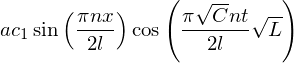

In [13]:
c1,c2,c3,c4=sympy.symbols('c1 c2 c3 c4') # creating symbols for coefficients 
c2=0 # found via application of boundary conditions 
#n,L,C,l=1,1,1,1 # assume 1 for now
phi = (n*sympy.pi/(2*l))**2 # found via application of boundary conditions
c4 = a # found via initial conditions
c3 = 0 # found via intial conditions
chi_sol_expr=c1*sympy.sin(sympy.sqrt(phi)*x) + c2*sympy.cos(sympy.sqrt(phi)*x) # expression for chi solution
theta_sol_expr = c3*sympy.sin(sympy.sqrt(C*L*phi)*t) + c4*sympy.cos(sympy.sqrt(C*L*phi)*t) # expression for theta solution
vol_sol = chi_sol_expr*theta_sol_expr # expression for voltage solution
vol_sol

This is exactly the same solution as what we derived ($c_1$ and $c_2$ are switched due to the code assigning $c_1$ to the sine function rather than the cosine, but as these are abitrary constants, the actual label of the constant is irrelevantas long as we are consistent), so we can turn this into a plot at our convenience. This will help us when we are comparing against our numerical solutions. It's also interesting to note that the quantity $c_1\alpha$ acts as the amplitude of the wave, and while part of that amplitude is determined by the initial condition, another part of that is completely arbitrary! It'll be interesting to see how that plays out in our numerical scheme.

Let's actually make a quick 3D plotting function, so that we can plot later. We won't plot just yet because we don't have the x and t vectors set up yet. That will happen as we set up our numerical analysis code.

In [4]:
# Creating the plot3d method (I'd rather see the 3d then attempt a contour-can change viewing angle as needed)
def plot3d(x, y, p):
    '''
    Plots a 3D graph - Figure Appears with appropriate limits and viewing angle, No Return Values
    ----------
    Parameters:
    ----------
    x: array of float
        nodal coordinates in x
    y: array of float
        nodal coordinates in y
    p: 2D array of float
        calculated potential field
    '''
    fig = pyplot.figure(figsize=(10,8), dpi=1000)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    
    # Cosmetics
    # ax.set_xlim(0,1) # Domain given in problem
    # ax.set_ylim(0,1) # Range given in problem
    ax.set_xlabel('$x$')
    ax.set_ylabel('$t$')
    ax.set_zlabel('$voltage$')
    ax.view_init(30,45)

So, now that we are pretty much done with the mathematical treatise, let's begin coding! Do following along with the comments in the code - they are there to explain code design choices as they relate to this problem.

## Let's Code the Numerical Solution!

Here the CFL condition becomes very relevant. From our sources, we know that the appropriate CFL condition from von Neumann Stability analysis is: 

$$\begin{gather}
\left|1-2\left[\left(\frac{\Delta t}{\sqrt{LC}\Delta x}\right)sin\left(\frac{n\Delta x}{2}\right)\right]^{2}\right|\leq 1\\
\implies -1\leq1-2\left[\left(\frac{\Delta t}{\sqrt{LC}\Delta x}\right)sin\left(\frac{n\Delta x}{2}\right)\right]^{2}\leq 1\\
\implies -2\leq -2\left[\left(\frac{\Delta t}{\sqrt{LC}\Delta x}\right)sin\left(\frac{n\Delta x}{2}\right)\right]^{2}\leq 0\\
\implies 0\leq 2\left[\left(\frac{\Delta t}{\sqrt{LC}\Delta x}\right)sin\left(\frac{n\Delta x}{2}\right)\right]^{2}\leq 2\\
\implies 0\leq \left[\left(\frac{\Delta t}{\sqrt{LC}\Delta x}\right)sin\left(\frac{n\Delta x}{2}\right)\right]^{2}\leq 1\\
\implies 0\leq \left[\left(\frac{\Delta t}{\sqrt{LC}\Delta x}\right)sin\left(\frac{n\Delta x}{2}\right)\right]\leq 1\\
\implies 0\leq \Delta t\leq \frac{\sqrt{LC}\Delta x}{sin\left(\frac{n\Delta x}{2}\right)}\\
\implies 0\leq \Delta t\leq \frac{\sqrt{LC}\Delta x}{sin\left(\frac{\Delta x}{2}\right)}, n=1
\end{gather}$$

We can take only the first mode ($n=1$) and use that to find an appropriate $\Delta t$. This should prevent our solution from blowing up, but will result in a $\Delta t$ that is different everytime we change $\Delta x$. This means we have to be careful when making our plotting vectors. We are also going to keep both the actual intialization and loop to solve the solution in the same cell, so we don't have to keep running both the initialization cell and then the solution cell.

0.002 0.000200000033333 0.100000016667


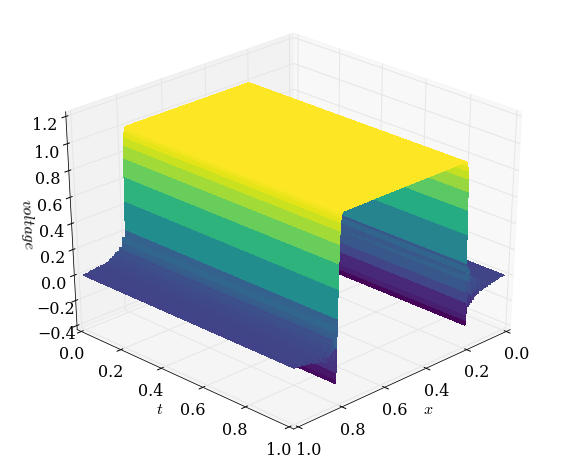

In [6]:
## Set up initial conditions
nx,nt = 501,1001 # grid size
l,T = 1,1 # space/time domain
dx = l/(nx-1) # mesh element size in space
x = numpy.linspace(0,l,nx) # x for plotting
alpha = 1 # random dirichlet initial condition
lbc,rbc = 0,0 # boundary conditions on both the left and right sides of the array/space domain
LC = 1 # Inductance-Capacitance product, assumed one for ease of code.
dt = .1*((numpy.sqrt(LC)*dx)/(numpy.sin(dx/2))) # take positive percentage  to ensure we are within stability range
t = numpy.linspace(0,T,nt) # t for plotting

## Initialize solution array. 
#  Here, we will only keep the three solutions of the problem. Solutions will correspond to n, n-1, n-2 in time. 
#    - n-2 will be our initial dirichlet condition and will be row 0
#    - n-1 will be our initial neumann condition and will be row 1
#    - n will be our first iteration using the initial conditions and will be stored in row 2
#  
#  After each iteration, the following transforms will occur
#    - row 1 -> row 0
#    - row 2 -> row 1
#    - row 2 to always hold next iteration of the code
# 
#  The logic behind doing this is to allow the number of time steps to increase arbitrarily, without having to append
#  This essentially allows the us to preallocate and hold onto only the final solution in row 2.
#
#  Thus, it becomes important to note that from cell [0,0], held at the upper left corner of this array:
#    - time (t) increases as the number of rows increase [so t increases as you go down the array]
#    - space (x) increase as the number of columns increase [so x increases as you go towards the right side of the array]
## <End Comment Block>

voltage = numpy.zeros((3,nx)) # create a 3 by nx array of zeros to start with.
voltage[0,:] = alpha # set row zero to the dirichlet condition
voltage[:,0], voltage[:,-1] = lbc,rbc # set the boundary conditions
voltage[1,1:-1] = (dt**2/(2*dx**2))*(voltage[0,2:]+\
                   voltage[0,0:-2])+voltage[0,1:-1]*(1-dt**2/dx**2) # neumann condition on row 1
## Note:
#  Here we set the initial condition first, and then the boundary conditions, This means that, at the corner cells,
#  the boundary condition takes precedence and will be set to the boundary conditions. This may not make sense 
#  immediately, but consider how the boundary conditions change with time. In our problem, they don't. Therefore,
#  regardless of what time value the solution is at, the dirichlet conditions will always hold. This also means that at 
#  time t = t_initial, the boundary conditions must hold true. If this is not the case for a different problem, say if 
#  the boundary conditions do have a time dependancy, then the corner values must be handled appropriately.
#
#  The Neumann condition is set last, but doesn't influence the boundary conditions, so those will remain zero. If our
#  array was only 5 blocks long, it would currently look like this, with a as alpha and # as the neumann solution:
#
#  ---------------------
#  | 0 | a | a | a | 0 |
#  ---------------------
#  | 0 | # | # | # | 0 |
#  ---------------------
#  | 0 | 0 | 0 | 0 | 0 |
#  ---------------------
#  
#  We now have finished initializing our solution with both the boundary and the initial conditions.
## <End Comment Block>

## Create loop. 
#  This may be counter intuitive, but the timesteps have to start with the solution for row 2. Row 1 and row 0 are both 
#  initial conditions. They don't actually represent a step in time. Row 2 is the first timestep. Thus, we have to iterate
#  over the entire time domain, not time domain - 2 timesteps.
## <End Comment Block>

for i in range(nt):
    ## Debugging Code, to be commented out once program is running
    #  can also be uncommented as needed in case you'd like to see the inner workings of each iteration
    #  !! Set nt -> 3 in for loop declaration only to take a quick look at the shapes and values
    #  print("Shape of voltage[2,1:-1]: ",voltage[2,1:-1].shape)
    #  print("Shape of voltage[1,2:]: ",voltage[1,2:].shape)
    #  print("Shape of voltage[1,0:-2]: ",voltage[2,0:-2].shape)
    #  print("Shape of voltage[1,1:-1]: ",voltage[1,1:-1].shape)
    #  print("Shape of voltage[0,1:-1]: ",voltage[0,1:-1].shape)
    #  display solution and iteration count
    #  print(i, voltage[2,:])
    ## <End debugging code>
    
    voltage[2,1:-1]=(dt**2/dx**2)*(voltage[1,2:]+voltage[1,0:-2])+\
        2*voltage[1,1:-1]*(1-dt**2/dx**2)-voltage[0,1:-1] # applying discretization schema to get next solution
    voltage[0,:] = voltage[1,:] # First transform: row 1 -> row 0
    voltage[1,:] = voltage[2,:] # Second transform: row 2 -> row 1
    # Note, Dirichlet Boundary conditions are automatically propogated and don't need to be reassigned

## Plot out numerical solution
plot3d(x,t,voltage[2,:])

Now we can also plot the exact result from our solution to see what it should look like! First, we'll print out our exact voltage solution that we got from sympy in a manner where we can turn it into a function.

### Plotting Exact Solution

In [7]:
print(vol_sol)

a*c1*sin(pi*n*x/(2*l))*cos(pi*sqrt(C)*sqrt(L)*n*t/(2*l))


Now that we have that, we can use it and numpy to create a solver function that will give us the exact solution, and use that to plot the exact solution!

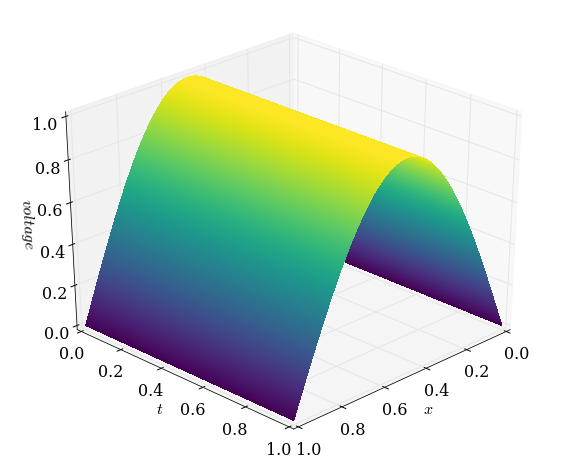

In [9]:
def exact_solver(alpha,c,n,x,l,LC,t):
    '''
    Find the exact solution of the Wave equation
    ----------
    Parameters:
    ----------
    alpha: scalar
        value of initial dirichlet condition
    c: scalar
        arbitrary constant
    n: scalar
        mode of solution (which multiple of pi/2 to use)
    x: array of float
        nodal coordinates in x
    l: scalar
        length of space domain
    LC: scalar
        value of Inductance-Capacitance product
    t: 2D array of float
        nodal coordinates in t
    -------
    Returns:
    -------
    solution: 2D array of float
        solved solution values
    '''
    solution = alpha*c*numpy.sin(numpy.pi*n*x/(2*l))*numpy.cos(numpy.pi*numpy.sqrt(LC)*n*t/(2*l))
    return solution

exact_sol = exact_solver(alpha,2,1,x,l,LC,t[0::round(nt/nx)])
plot3d(x,t,exact_sol)

## Conclusions

From the two plots, we can see that the numerical solution we have derived does approximate the graph. Another thing to note is that because of that arbitrary constant in front of the solved solution, the amplitude of the solution is somewhat arbitrary, unless it is defined by some other constraint. 

Normally, this constant is simply set as 1 in order to eliminate from consideration. While this is completely reasonable, it also avoids a real fact, that the there are an infinite amount of solutions to the math problem, while the actualy physical system will generally only have one solution at a given time (some of the parameters used to deterimine the constant could be perterbations or microscopic deformities in the material that the model doesn't consider).

Thus, while mathematically sound, it may not be the best idea to ignore the arbitrary constant when modeling a physical system. If you do, the only real validation you have is whether the model shapes match up with expected shapes.

Another thing to note is the negative values seen in the numerical solution. These can be atributed to the higher order terms that we neglected, which could allow those terms to be positive. 

### Dig Deeper
Now that we have both the exact solution and the numerical method, we can use these to find the current. Analytically, if we use Equations 2 and 45, we can find a solution for the current:

$$\begin{gather}
\frac{\partial}{\partial x}\left[v(x,t)\right]=-L\frac{\partial}{\partial t}\left[i(x,t)\right]\tag{2}\\
v(x,t)=c_{2}\alpha cos\left(\frac{tn\pi}{2l}\sqrt{LC}\right)sin\left(\frac{xn\pi}{2l}\right)\tag{45}\\
\implies i(x,t) = \frac{c_{2}\alpha}{t\sqrt{L^{3}C}}sin\left(\frac{tn\pi}{2l}\sqrt{LC}\right)cos\left(\frac{xn\pi}{2l}\right)
\end{gather}$$

Be sure you understand where the solution comes from! From this, how would you discretize the solution for current?